In [2]:
## import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as sk_preprocessing
from sklearn import linear_model as sk_linear_model
from sklearn import metrics as sk_metrics

## Generate dataset 

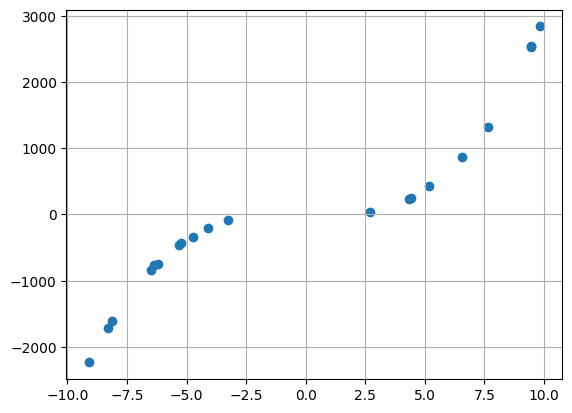

In [3]:
### This code block generates a test dataset based upon a ground truth function and some artifical noise. 
### Parameters: 
# number of datapoints 
n = 20; 
# minimum and maximum x value 
x_min = -10; 
x_max = 10; 
# standard deviation of the gaussian noise added
sigma = 25; 
# underlying ground truth function
def myFunc(x):
    y = 3*x*x*x - x + 5
    return y

### Code: 
# sample the random points for the dataset between x_min and x_max
x_sample = np.random.rand(n, 1)*(x_max - x_min) + x_min
# evaluate the ground truth function and add noise to the result 
y_sample = myFunc(x_sample) + np.random.normal(0, sigma, (n, 1))
# plot the dataset 
plt.scatter(x_sample, y_sample)
plt.grid(True)

## Split dataset into training and test

In [4]:
### Parameters: 
# define the size of the training set in percent. 
# Do not use too small or too high values as the remaining algorithms require to have a valid training and test dataset. 
training_perc = 70

### Code: 
# calculate which index splits the data into training and validation set 
idx_split = int(np.floor(n*training_perc/100))
if idx_split < 1: 
    print('Chosen training set is too small!\n')
if idx_split > (n-1): 
    print('Chosen training set is too big!\n')

# split the model into training and test sets
x_training = x_sample[1:idx_split]
x_test = x_sample[(idx_split+1):n]
y_training = y_sample[1:idx_split]
y_test = y_sample[(idx_split+1):n]
# generate equally spaced x values to plot the identified model later
x_plot = np.reshape(np.linspace(x_min, x_max, n), (n,1))

## Polynomial Regression with Ordinary Least Squares

In [5]:
def ols_regression(PolyDegree, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    ols_poly = sk_preprocessing.PolynomialFeatures(ols_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    ols_X_test = ols_poly.fit_transform(x_test)
    ols_X_training = ols_poly.fit_transform(x_training)
    ols_X_plot = ols_poly.fit_transform(x_plot)

    # Create linear regression object
    ols_regr = sk_linear_model.LinearRegression(fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    ols_regr.fit(ols_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    ols_y_pred_training = ols_regr.predict(ols_X_training)
    ols_y_pred_test = ols_regr.predict(ols_X_test)
    ols_y_plot = ols_regr.predict(ols_X_plot)

    # print the coefficients
    print('Coefficients: \n', ols_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, ols_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, ols_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, ols_y_plot, color='blue', linewidth=3)
    plt.grid(True)
    
    return ols_y_plot

## Polynomial Regression with L2 Regularization ( Ridge Regression )

In [6]:
### Code
def ridge_regression(PolyDegree, reg_lambda2, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    ridge_poly = sk_preprocessing.PolynomialFeatures(l2_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    ridge_X_test = ridge_poly.fit_transform(x_test)
    ridge_X_training = ridge_poly.fit_transform(x_training)
    ridge_X_plot = ridge_poly.fit_transform(x_plot)

    # Create linear regression object
    ridge_regr = sk_linear_model.Ridge(alpha=reg_lambda2, fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    ridge_regr.fit(ridge_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    ridge_y_pred_training = ridge_regr.predict(ridge_X_training)
    ridge_y_pred_test = ridge_regr.predict(ridge_X_test)
    ridge_y_plot = ridge_regr.predict(ridge_X_plot)

    # print the coefficients
    print('Coefficients: \n', ridge_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, ridge_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, ridge_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, ridge_y_plot, color='blue', linewidth=3)
    plt.grid(True)

    return ridge_y_plot

## Polynomial Regression with L1 regularization ( Lasso Regression )

In [7]:
### Code
def lasso_regression(PolyDegree, reg_lambda1, x_test, x_training, x_plot, y_test, y_training):
    # Create a preprocessing object for the given polynomial degree configuration
    lasso_poly = sk_preprocessing.PolynomialFeatures(l1_PolyDegree)
    
    # Create the design matrices for the test, the training and the plot points 
    lasso_X_test = lasso_poly.fit_transform(x_test)
    lasso_X_training = lasso_poly.fit_transform(x_training)
    lasso_X_plot = lasso_poly.fit_transform(x_plot)

    # Create linear regression object
    lasso_regr = sk_linear_model.Lasso(alpha=reg_lambda1, fit_intercept=False)
    
    # Train the model based on the training design matrix and the training output data
    lasso_regr.fit(lasso_X_training, y_training)

    # Predict the output data for the training, the test and the plot points
    lasso_y_pred_training = lasso_regr.predict(lasso_X_training)
    lasso_y_pred_test = lasso_regr.predict(lasso_X_test)
    lasso_y_plot = lasso_regr.predict(lasso_X_plot)

    # print the coefficients
    print('Coefficients: \n', lasso_regr.coef_)
    # print the MSE for the training and the test dataset
    print("Mean squared error on the training dataset: %.2f"
          % sk_metrics.mean_squared_error(y_training, lasso_y_pred_training))
    print("Mean squared error on the test dataset: %.2f"
          % sk_metrics.mean_squared_error(y_test, lasso_y_pred_test))

    # Plot the results of the test dataset and the identified model based on the plot points
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_plot, lasso_y_plot, color='blue', linewidth=3)
    plt.grid(True)
    
    return lasso_y_plot

## Comparison of Polynomial Regression Algorithms

Coefficients: 
 [[-2.23573877e+01 -1.10038274e+01  1.63836873e+00  3.72247995e+00
  -2.86252093e-02 -8.95250076e-03]]
Mean squared error on the training dataset: 119.24
Mean squared error on the test dataset: 42425.15


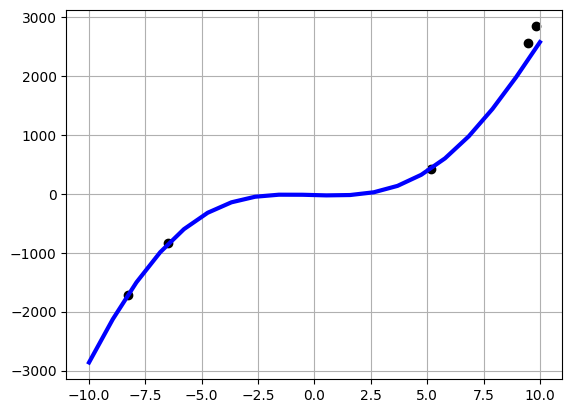

In [8]:
### Parameters: 
ols_PolyDegree = 5
### apply OLS regression
ols_y_plot = ols_regression(ols_PolyDegree, x_test, x_training, x_plot, y_test, y_training)

Coefficients: 
 [[-0.22590592 -2.40863717 -0.03764203  3.24812235 -0.00366141 -0.0034967 ]]
Mean squared error on the training dataset: 223.78
Mean squared error on the test dataset: 6416.73


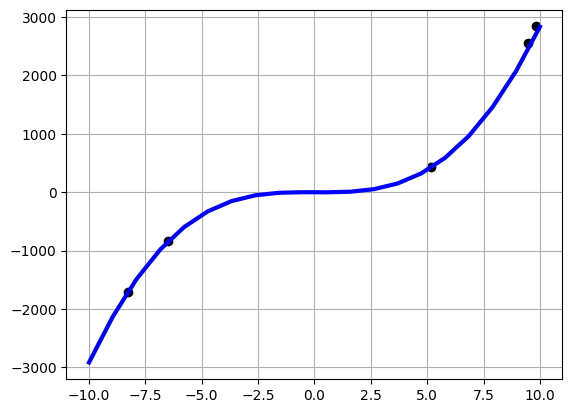

In [9]:
### Parameters: 
l2_PolyDegree = 5
reg_lambda2 = 50
### apply ridge regression
ridge_y_plot = ridge_regression(l2_PolyDegree, reg_lambda2, x_test, x_training, x_plot, y_test, y_training)

Coefficients: 
 [-1.75326949e+01 -1.04336240e+01  1.27939059e+00  3.68025019e+00
 -2.36342331e-02 -8.37565676e-03]
Mean squared error on the training dataset: 120.89
Mean squared error on the test dataset: 34745.23


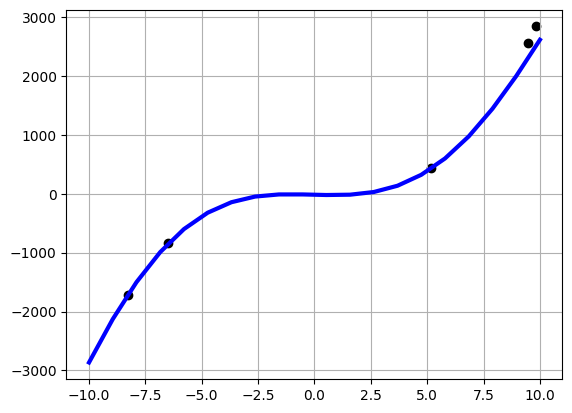

In [10]:
### Parameters: 
l1_PolyDegree = 5
reg_lambda1 = 0.1
### apply lasso regression
lasso_y_plot = lasso_regression(l1_PolyDegree, reg_lambda1, x_test, x_training, x_plot, y_test, y_training)

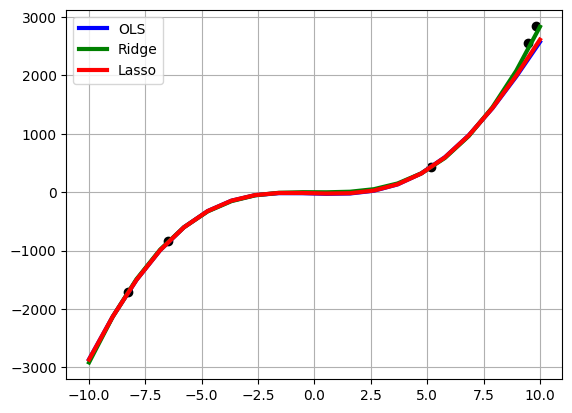

In [11]:
# plot and compare data 
plt.scatter(x_test, y_test, color='black')
plt.plot(x_plot, ols_y_plot, color='blue', linewidth=3, label='OLS')
plt.plot(x_plot, ridge_y_plot, color='green', linewidth=3, label='Ridge')
plt.plot(x_plot, lasso_y_plot, color='red', linewidth=3, label='Lasso')
plt.grid(True)
plt.legend()